## More from arch

_This setup code is required to run in an IPython notebook_

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://localhost', connect_args={'read_default_file': '~/.mytest.cnf'})


In [3]:
import pandas as pd

with engine.connect() as conn:
    SQL_query = pd.read_sql_query(
        '''select tradedate, pct_close from USEQ_HIST where symbol='MS'
         order by tradedate''',
        conn,
        index_col='tradedate'
    )
    df = pd.DataFrame(SQL_query, columns=['pct_close'])

df.head()

,pct_close
tradedate,
2016-01-05,-0.635320
2016-01-06,-2.493610
2016-01-07,-4.983610
2016-01-08,-2.070390
2016-01-11,0.281888


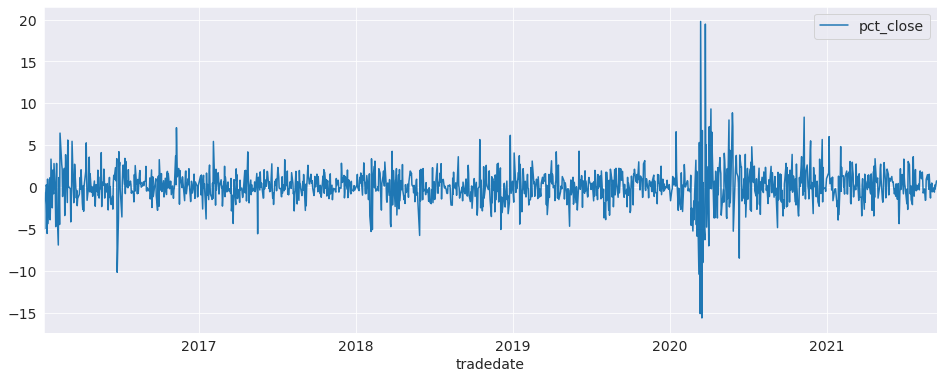

In [4]:
ax = df.plot()
xlim = ax.set_xlim(df.index.min(), df.index.max())

In [5]:
from arch import arch_model

## GJR-Garch with Student's T

In [6]:
am = arch_model(df, p=1, o=1, q=1, dist="StudentsT")
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     47,   Neg. LLF: 2782.9029169258774
Iteration:     10,   Func. Count:     92,   Neg. LLF: 2778.024831268469
Iteration:     15,   Func. Count:    136,   Neg. LLF: 2777.3046821591906
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2777.298971035727
            Iterations: 18
            Function evaluations: 160
            Gradient evaluations: 18
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                    pct_close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2777.30
Distribution:      Standardized Student's t   AIC:                           5566.60
Method:                  Maximum Likelihood   BIC:                           5598.17
                                              No. Observation

`plot()` can be used to quickly visualize the standardized residuals and conditional volatility.


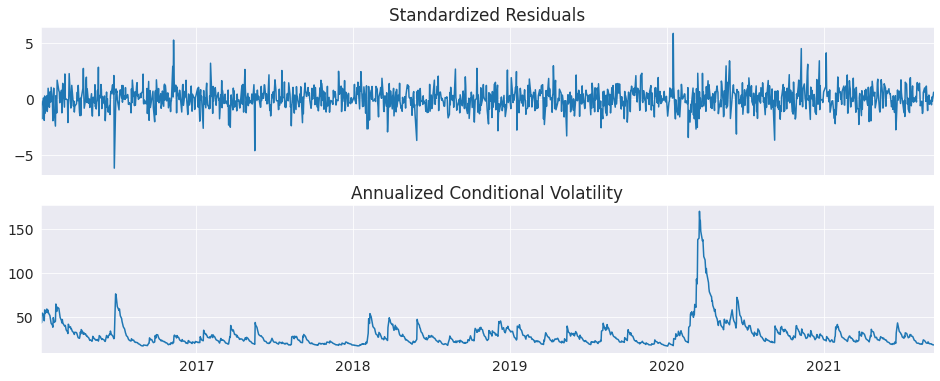

In [7]:
fig = res.plot(annualize="D")

## Parameters


In [8]:
res.params

mu          0.079678
omega       0.144321
alpha[1]    0.033268
gamma[1]    0.165021
beta[1]     0.851894
nu          5.464822
Name: params, dtype: float64

## Forecasts

In [9]:
forecasts = res.forecast(reindex=False)
print(forecasts.mean.iloc[-3:])

forecasts = res.forecast(horizon=10, reindex=False)
print(forecasts.residual_variance.iloc[-3:])



                 h.1
tradedate           
2021-09-13  0.079678
                h.01      h.02      h.03     h.04     h.05      h.06  \
tradedate                                                              
2021-09-13  1.330426  1.431737  1.529773  1.62464  1.71644  1.805272   

                h.07      h.08      h.09      h.10  
tradedate                                           
2021-09-13  1.891233  1.974415  2.054907  2.132798  
